# Reiforcement Learning ep.0: Dynamic Programming 

<a target="_blank" href="https://colab.research.google.com/github/nickplas/Intro_to_ML_24-25/blob/main/notebooks/Lab-15.RL_Dynamic_programming.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

***Suggested book:*** “Reinforcement Learning: An Introduction. Second edition.” by Richard S. Sutton and Andrew G. Barto.

**Goal:** *teach a Taxi to pick up and drop off passengers at the right locations with Reinforcement Learning*.

## Quick recap
Consider the scenario of teaching a dog new tricks. The dog doesn't understand our language, so we can't tell him what to do. Instead, we follow a different strategy. We emulate a situation (or a cue), and the dog tries to respond in many different ways. If the dog's response is the desired one, we reward them with snacks. Now guess what, the next time the dog is exposed to the same situation, the dog executes a similar action with even more enthusiasm in expectation of more food. That's like learning "what to do" from positive experiences. Similarly, dogs will tend to learn what not to do when face with negative experiences.

That's exactly how Reinforcement Learning works in a broader sense:

* Your dog is an "agent" that is exposed to the **environment**. The environment could in your house, with you.
* The situations they encounter are analogous to a **state**. An example of a state could be your dog standing and you use a specific word in a certain tone in your living room.
* Our agents react by performing an **action** to transition from one "state" to another "state," your dog goes from standing to sitting, for example.
* After the transition, they may receive a **reward** or **penalty** in return. You give them a treat! Or a "No" as a penalty.
* The **policy** is the strategy of choosing an action given a state in expectation of better outcomes.


Reinforcement Learning lies between the spectrum of Supervised Learning and Unsupervised Learning, and there's a few important things to note:

1. **Being greedy doesn't always work**  
There are things that are easy to do for instant gratification, and there's things that provide long term rewards. The goal is to not be greedy by looking for the quick immediate rewards, but instead to optimize for maximum rewards over the whole training.  
2. **Sequence matters in Reinforcement Learning**  
The reward agent does not just depend on the current state, but the entire history of states. Unlike supervised and unsupervised learning, time is important here.

### The process
In a way, Reinforcement Learning is the science of making optimal decisions using experiences. Breaking it down, the process of Reinforcement Learning involves these simple steps:

1. Observation of the environment
2. Deciding how to act using some strategy
3. Acting accordingly
4. Receiving a reward or penalty
5. Learning from the experiences and refining our strategy
6. Iterate until an optimal strategy is found


![alt](https://storage.googleapis.com/lds-media/documents/Reinforcement-Learning-Animation.gif)


## Self-driving cab

Let's design a simulation of a self-driving cab. The major goal is to demonstrate, in a simplified environment, how you can use RL techniques to develop an efficient and safe approach for tackling this problem.

The Smartcab's job is to pick up the passenger at one location and drop them off in another. Here are a few things that we'd love our Smartcab to take care of:

* Drop off the passenger to the right location.
* Save passenger's time by taking minimum time possible to drop off
* Take care of passenger's safety and traffic rules


There are different aspects that need to be considered here while modeling an RL solution to this problem: rewards, states, and actions.

#### Rewards

Since the agent (the imaginary driver) is reward-motivated and is going to learn how to control the cab by trial experiences in the environment, we need to decide the rewards and/or penalties and their magnitude accordingly. Here a few points to consider:

* The agent should receive a high positive reward for a successful dropoff because this behavior is highly desired
* The agent should be penalized if it tries to drop off a passenger in wrong locations
* The agent should get a slight negative reward for not making it to the destination after every time-step. "Slight" negative because we would prefer our agent to reach late instead of making wrong moves trying to reach to the destination as fast as possible

#### State Space
In Reinforcement Learning, the agent encounters a state, and then takes action according to the state it's in.

The State Space is the set of all possible situations our taxi could inhabit. The state should contain useful information the agent needs to make the right action.

Let's say we have a training area for our Smartcab where we are teaching it to transport people in a parking lot to four different locations (R, G, Y, B):

![alt](https://storage.googleapis.com/lds-media/images/Reinforcement_Learning_Taxi_Env.width-1200.png)

Let's assume Smartcab is the only vehicle in this parking lot. We can break up the parking lot into a $5x5$ grid, which gives us $25$ possible taxi locations. These $25$ locations are one part of our state space. Notice the current location state of our taxi is coordinate $(3, 1)$.

You'll also notice there are 4 locations that we can pick up and drop off a passenger: R, G, Y, B or $[(0,0), (0,4), (4,0), (4,3)]$ in (row, col) coordinates. Our illustrated passenger is in location Y and they wish to go to location R.

When we also account for one additional passenger state of being inside the taxi, we can take all combinations of passenger locations and destination locations to come to a total number of states for our taxi environment; there's $4$ destinations and five $(4 + 1)$ passenger locations.

So, our taxi environment has $5x5x5x4 = 500$ total possible states.

#### Action Space

The agent encounters one of the 500 states and it takes an action. The action in our case can be to move in a direction or decide to pickup/dropoff a passenger.

In other words, we have six possible actions:

1. South
2. North
3. East
4. West
5. Pickup
6. Dropoff

This is the action space: the set of all the actions that our agent can take in a given state.

You'll notice in the illustration above, that the taxi cannot perform certain actions in certain states due to walls. In environment's code, we will simply provide a $-1$ penalty for every wall hit and the taxi won't move anywhere. This will just rack up penalties causing the taxi to consider going around the wall.


### Implementation

Fortunately, [OpenAI Gymnasium](https://gymnasium.farama.org) has this exact environment already built for us.

Gym provides different game environments which we can plug into our code and test an agent. The library takes care of API for providing all the information that our agent would require, like possible actions, score, and current state. We just need to focus just on the algorithm part for our agent.

We'll be using the Gym environment called [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/), which all of the details explained above were pulled from. The objectives, rewards, and actions are all the same.

First, we need to install `gymnasium`. Then, we can load the game environment and render what it looks like.

In [1]:
! pip install gymnasium
! pip install pygame


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: c:\users\39346\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: c:\users\39346\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip


In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython import display
from IPython.display import clear_output
from time import sleep
import random

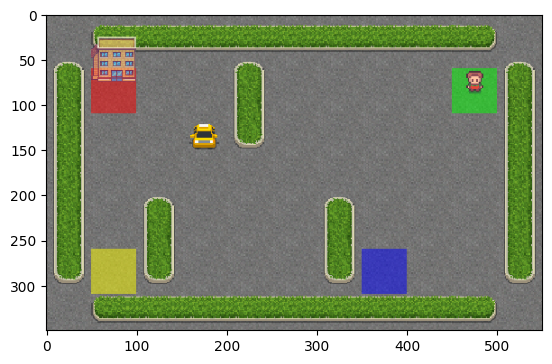

In [3]:
env = gym.make('Taxi-v3',render_mode = "rgb_array").env

env.reset()
img = env.render()
plt.imshow(img)

The core gym interface is `env`, which is the unified environment interface. The following are the `env` methods that would be quite helpful to us:

* `env.reset`: Resets the environment and returns a random initial state.
* `env.step(action)`: Step the environment by one timestep. Returns
  - **observation**: Observations of the environment
  - **reward**: If your action was beneficial or not
  - **done**: Indicates if we have successfully picked up and dropped off a passenger, also called one episode
  - **truncated**: Whether the truncation condition outside the scope of the MDP is satisfied. Typically, this is a timelimit, but could also be used to indicate an agent physically going out of bounds
  - **info**: Additional info containing the probability that the state is taken and a mask of what actions will result in a change of state to speed up training
* `env.render`: Renders one frame of the environment (helpful in visualizing the environment)

*Note*: We are using the `.env` on the end of make to avoid training stopping at 200 iterations, which is the default for the new version of Gym.

Here's our restructured problem statement (from Gym docs):

> There are 4 locations (labeled by different letters), and our job is to pick up the passenger at one location and drop him off at another. We receive +20 points for a successful drop-off and lose 1 point for every time-step it takes. There is also a 10 point penalty for illegal pick-up and drop-off actions.

Let's dive more into the environment.

In [4]:
print("Action Space: {}".format(env.action_space))
print("State Space: {}".format(env.observation_space))

Action Space: Discrete(6)
State Space: Discrete(500)


As verified by the prints, we have an Action Space of size $6$ and a State Space of size $500$. As you'll see, our RL algorithm won't need any more information than these two things. All we need is a way to identify a state uniquely by assigning a unique number to every possible state, and RL learns to choose an action number from 0-5 where:

- 0 = south
- 1 = north
- 2 = east
- 3 = west
- 4 = pickup
- 5 = dropoff

Recall that the $500$ states correspond to a encoding of the taxi's location, the passenger's location, and the destination location.

Reinforcement Learning will learn a mapping of **states** to the optimal **action** to perform in that state by *exploration*, i.e. the agent explores the environment and takes actions based off rewards defined in the environment.

The optimal action for each state is the action that has the *highest cumulative long-term reward*.

When the Taxi environment is created, there is an initial Reward table that's also created, called `P`. We can think of it like a matrix that has the number of states as rows and number of actions as columns, i.e. a $states \times actions$ matrix.

Since every state is in this matrix, we can see the default reward values assigned to our illustration's state. The output is a dictionary with the structure `{action: [(probability, nextstate, reward, done)]}`.

In [5]:
current_state = env.env.unwrapped.s
print("Current state: {}".format(current_state))

Current state: 124


In [6]:
env.unwrapped.P[current_state]

{0: [(1.0, 224, -1, False)],
 1: [(1.0, 24, -1, False)],
 2: [(1.0, 124, -1, False)],
 3: [(1.0, 104, -1, False)],
 4: [(1.0, 124, -10, False)],
 5: [(1.0, 124, -10, False)]}

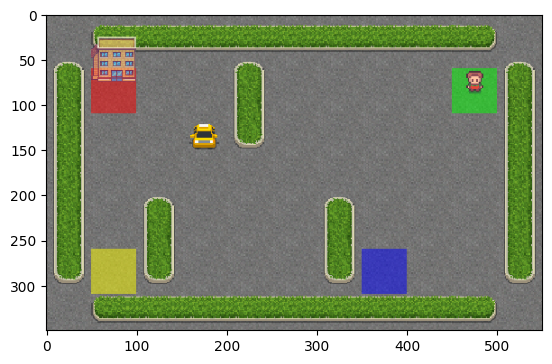

In [7]:
# to have close for comparison
plt.imshow(img)

A few things to note:

- The 0-5 corresponds to the actions (south, north, east, west, pickup, dropoff) the taxi can perform at our current state in the illustration.
- In this env, `probability` is always 1.0.
- The `nextstate` is the state we would be in if we take the action at this index of the dict
- All the movement actions have a -1 reward and the pickup/dropoff actions have -10 reward in this particular state. If we are in a state where the taxi has a passenger and is on top of the right destination, we would see a reward of 20 at the dropoff action (5)
- `done` is used to tell us when we have successfully dropped off a passenger in the right location. Each successfull dropoff is the end of an episode 

The source code has made it impossible to actually move the taxi across a wall, so if the taxi chooses that action, it will just keep accumulating $-1$ penalties, which affects the long-term reward.

### Solving the environment without RL
Let's see what would happen if we try to brute-force our way to solving the problem without RL.

Since we have our `P` table for default rewards in each state, we can try to have our taxi navigate just using that.

We'll create an infinite loop which runs until one passenger reaches one destination (one episode), or in other words, when the received reward is $20$. The `env.action_space.sample()` method automatically selects one random action from set of all possible actions.

Let's see what happens:

In [8]:
epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False
maxepochs = 1000

while not done:
    action = env.action_space.sample()
    state, reward, done, truncated, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1

    if truncated:
      break 
    if epochs == maxepochs:
      break
    

print("Done: {}".format(done))
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Done: False
Timesteps taken: 1000
Penalties incurred: 321


In [9]:
# deprecated, very slow and messy
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        plt.imshow(frame['frame'])
        plt.title(f"Timestep: {i + 1}")
        plt.axis("off")
        plt.show()

        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        plt.pause(0.2)
        sleep(0.2)


# use this to visualise what is happening
def display_animation(frames):
  # turn off matplotlib plot in notebook
  plt.ioff()

  fps = 5   # Set frames per seconds
  dpi = 300  # Set dots per inch
  interval = 100  # Interval between frames (in ms)

  # Retrieve frames from experience buffer
  allframes = []
  for frame in frames:
      allframes.append(frame['frame'])

  # Fix frame size
  plt.figure(figsize=(allframes[0].shape[1] / dpi, allframes[0].shape[0] / dpi), dpi=dpi)
  patch = plt.imshow(allframes[0])
  plt.axis('off')

  # Generate animation
  def animate(i):
      patch.set_data(allframes[i])

  anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(allframes), interval=interval)

  video = anim.to_html5_video()
  html = display.HTML(video)
  return html

In [11]:
html = display_animation(frames)
display.display(html)

If rendering does not work install ffmpeg.

Not good. Our agent takes thousands of timesteps (if we let it) and makes lots of wrong drop offs to deliver just one passenger to the right destination.

This is because we aren't learning from past experience. We can run this over and over, and it will never optimize. The agent has no memory of which action was best for each state, which is exactly what Reinforcement Learning will do for us.

## Policy Iteration

A common way to solve the MDPs problems is though Policy Evaluation algorithm. It iteratively applies policy evaluation and improvement until convergence. 

To clarify:

- Policy evaluation: computing the state-value function $v_\pi (s)$ for the current policy $\pi$ and $\forall s \in \mathcal{S}$, this is also called 'prediction problem'
- Policy improvement: improving the policy by updating the actions recomended by the action-value function $q_\pi (s, a)$ derived from the state value funcion computed in the previous step.

The prediction problem can be solved using the Bellman Equation:

\begin{equation}
    v_\pi (s) = \mathbb{E}_\pi [r_{t+1} + \gamma v_\pi (s_{t + 1}) | s_t = s] = \sum_a \pi (a|s) \sum_{s', a'} p(s', r | s, a) [r + \gamma v(s')]
\end{equation}

where:

- r is the reward obtained the action a from state. In many books it is denoted as r(s, a) or even r(s', a, s) to specify the starting state, the action and the new state.
- $\gamma \in$ [0,1] is the discount factor (or discount rate) and determines the present values of the future rewards.
- p(s', r | s, a) is the transition probability

The action-value function in the policy improvement step can be computes in the following way:

\begin{equation}
    q_\pi (s,a) = \sum_s p(s', r | s, a)[r + \gamma v_\pi (s')]
\end{equation}

Specifically, we are looking for the actions that maximizes the action value function, so the improved policy is computed as it follows:

\begin{equation}
    \pi ' (s) = \textit{argmax}_a q_\pi (s, a)
\end{equation}

The complete algorithm is shown here: 

![Alt text](https://3.bp.blogspot.com/-MgVsC80Z8tw/Xx8uR7rM_TI/AAAAAAAAJoo/FUDT7k58a4IkdHYojUD_BU5elxx_eYucgCLcBGAsYHQ/s1600/policy_iteration_2.png "a title")

#### ***1. Write the code for policy iteration***

In [125]:
# YOUR CODE
import numpy as np
import copy

class policy_iteration:

    def __init__(self, env, observation_space, action_space, gamma):

        self.env = env
        self.states = np.array([i for i in range (observation_space)])
        self.actions = np.array([i for i in range (action_space)])
        self.values = np.zeros(observation_space)
        self.policy = np.array([np.random.choice(self.actions) for s in self.states]) # Initially random policy
        self.gamma = gamma
    
    def policy_evaluation(self, epsilon = 0.01):
        delta = epsilon + 1
        while delta > epsilon:
            delta = 0
            for s in self.states:
                temporary_v = self.values[s]
                a = self.get_action(s)
                prob, next_s, rew, done  = env.env.unwrapped.P[s][a][0]
                if done:
                    self.values[s] = prob*(rew)
                else:
                    self.values[s] = prob*(rew + self.gamma*self.values[next_s])
                if abs(self.values[s] - temporary_v) > delta:
                    delta = abs(self.values[s] - temporary_v)
    
    def policy_improvement(self):
        stability = True
        for s in self.states:
            old_act = self.get_action(s)
            expectations = [-float("inf") for a in self.actions]
            for a in self.actions:
                prob, next_s, rew, done  = env.env.unwrapped.P[s][a][0]
                if done:
                    expectations[a] = prob*rew
                else:
                    expectations[a] = prob*(rew + self.gamma*self.values[next_s])
            self.policy[s] = np.argmax(expectations)
            if self.policy[s] != old_act:
                stability = False
        return stability

    def optimize(self, verbose = True):
        stability = False
        i = 0
        while (not stability):
            if verbose:
                print(f"Step number {i}")
            self.policy_evaluation()
            stability = self.policy_improvement()
            i += 1
        
    def get_action(self, state):
        return self.policy[state]

In [128]:
PI = policy_iteration(env, 500, 6, 0.99)
PI.optimize(verbose=False)

In [129]:
epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False
maxepochs = 1000

state, _ = env.reset()


while not done:
    action = PI.get_action(state)
    state, reward, done, truncated, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1

    if truncated:
      break 
    if epochs == maxepochs:
      break
    

print("Done: {}".format(done))
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Done: True
Timesteps taken: 12
Penalties incurred: 0


In [130]:
html = display_animation(frames)
display.display(html)

## Value Iteration

The problem with policy iteration is that it can be computationally expensive because of the policy evaluation that must be performed each step. A possible solution is the value iteration algorithm. In this case, tha Bellman equation is used as the update rule to update the state-value function at each step.

The complete algorithm is shown here: 

![Alt text](https://1.bp.blogspot.com/-5E2RlIH-2Po/Xx9JtKwDFRI/AAAAAAAAJo4/165pJrrMPIYzVRZ1Z6QWaHSV3Kf9eTdNwCLcBGAsYHQ/s1600/policy_iteration_3.png "a title")

#### ***2. Write the code for value iteration***




In [ ]:
# YOUR CODE